## SI 670 Applied Machine Learning, Week 5:  One-hot encoding, calibration, decision trees, random forests, data leakage. (Due Wednesday October 5 2022, 11:59pm.)

Total: 100 points
Question 1: 30 points
Question 2: 20 points
Question 3: 30 points 
Question 4: 20 points

* This homework is worth 100 points in total. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

* Submit your completed notebook file to the Canvas site - **IMPORTANT**: please name your submitted file `si670f22-hw5-youruniqname.ipynb`

* Any file submitted after the deadline will be marked as late. Please consult the syllabus regarding late submission policies. You can submit the homework as many time as you want, but only your latest submission will be graded.

* As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates. If you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.


### Question 1 (30 points)

This question doesn't require coding, in the sense of writing programs that do all the computing of the answer for you: you can figure out the answer by hand and then put your answers into the notebook by defining the correct numpy array in python. Alternatively you could write out your answers in markdown using simple LaTeX tags. (See [here](https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/) for how to write things with math operators in LaTeX format.)


#### (a) (10 points) One-hot encoding

If you have a dataset with three data points, and each data point has three features. Among them, X2 and X3 are categorical variables:

|    X1	|  X2 	|  X3	|
|----	|----	|----	|
|   1.3	|  a 	| a 	|
|   0.7 |  b 	| c 	|
|   2.1 |  a 	| b     |

X2 can take up the values a and b, and X3 can take up the values a, b and c.

Please manually convert this dataset into numerical format with the categorical variables transformed into one-hot encoding. Please keep the order of X1, X2, and X3, and use alphabetical order for the one-hot encoding.


#### (b) (10 points) Calibration
Recall the calibration curve has the predicted probability as its x-axis and the true probability (also known as the "empirical probability" as its y-axis. Suppose you are given a binary classifier and its predicted probabilities on a test set with 15 data points. The labels of these data points are also given. Please calculate the true probabilities in three bins: \[0, 0.3), \[0.3, 0.7), \[0.7, 1\]. You could further use these probabilities to draw a calibration curve but it's not required for this question. You only need to give the 3 numbers indicating the true probabilities for each bin.  It might help to recall the weather example from class: the "true" empirical probability of rain is just the fraction of times it *actually* rained according to the data, for a given predicted probability (or range of probabilities) from the weatherperson.

|Predicted probability | Label |
|----	               |----   |
|   0.40               |   0   |
|   0.77               |   1   |
|   0.84               |   0   |
|   0.68               |   0   |
|   0.73               |   1   |
|   0.88               |   1   |
|   0.69               |   0   |
|   0.24               |   0   |
|   0.70               |   1   |
|   0.41               |   1   |
|   0.34               |   1   |
|   0.18               |   1   |
|   0.31               |   1   |
|   0.58               |   1   |
|   0.00               |   0   |


#### (c) (10 points) Random forest parameters

Suppose your current random forest classifier is facing an overfitting situation. Please state whether increasing or decreasing the following parameters can potentially help you reduce overfitting or not, and why?

(i) `n_estimators`

(ii) `max_features`

(iii) `max_depth`

(iv) `n_jobs`


## → answer (a) 

|    X1	|  X2_a 	|  X2_b	|   x3_a	|  X3_b 	|  X3_c	| 
|----	|----	    |----	|----	    |----	    |----	| 
|   1.3	|  1 	    | 0 	|    1	    |  0 	    |  0	|
|   0.7 |  0 	    | 1 	|    0	    |  0 	    |  1	|
|   2.1 |  1 	    | 0     |    0	    |  1 	    |  0	|

## → answer (b) 

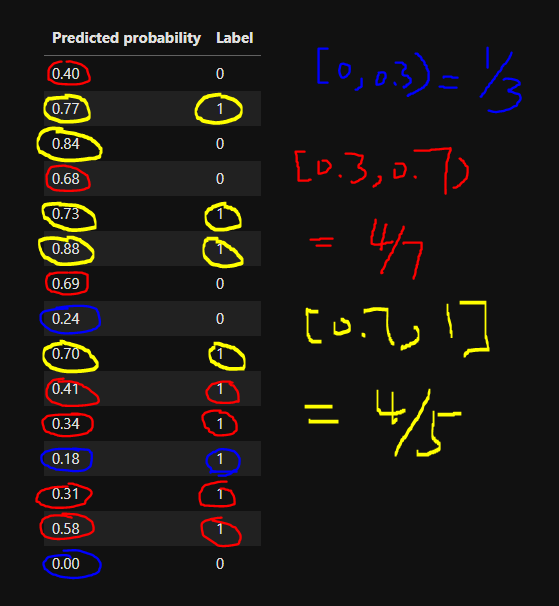

* so, the true probabilities in three bins: [0, 0.3), [0.3, 0.7), [0.7, 1]   
* P [0, 0.3): 1/3 = 0.3333    
* P [0.3, 0.7): 4/7 = 0.5714   
* P [0.7, 1]: 4/5 = 0.8   

## → answer (c) 

current random forest classifier is facing an overfitting, increasing or decreasing the following parameters can potentially help you reduce overfitting or not, and why?

(i) `n_estimators`: increasing this can reduce overfitiing, because this is the number of trees to use in ensemble (default: 10), should be larger for larger datasets to reduce overfitting; The less trees, the closer the model is to a decision tree, with a restricted feature set, which will easier cause overfitting.

(ii) `max_features`: decreasing this can reduce overfitiing(to 30-50% of the number of features). Because this determines how many features each tree is randomly assigned. The model is less likely to overfit if this value is smaller, the forest is more diversed, but too small may have under fitting.

(iii) `max_depth`: decreasing this can reduce the complexity which can reduce overfitting, this parameter controls the depth of each tree (default: None. Splits until all leaves are pure).  Usually can start from 5-10, and increasing to the best result.

(iv) `n_jobs`: this parameter does not help, because this is the number of jobs to run in parallel, only affact the runtime performance but not model itself.

### Question 2 (20 points) Cross-validation for very small datasets.

In our lecture about data leakage, we talked about one simple strategy to help you avoid data leakage: before you do any work with a new dataset, split off a final test dataset, and use this final test dataset as the very last step in your validation. However, when you have a very small dataset, one issue is that it leads to really tiny test sets, which leads to unreliable test evaluation scores. For example, if you have a dataset with a total of 60 samples, and hold back 25% as a final test set, you'll get a final test set with 15 samples. In this case, a single evaluation score based on merely 15 samples could be very unreliable and probably not something to be relied on heavily.

To make evaluation more reliable, we discussed how people usually use *cross-validation* to generate *multiple* evaluation scores, each on a different train/test split of the data. That is, you split the train and test set multiple times and then calculate the average of the resulting test scores. This is the approach we'll use to estimate a more reliable final test set score.  We don't want to use these final test sets to also tune our hyperparameters (to avoid data leakage), so we make sure to learn the model and tune the hyperparameters using only the data in the training split.  To do that, we do a second split *within the training data split* so that we have (i) a training set for the model and (ii) a separate *validation split* that's used to evaluate the model and pick the best setting for the hyperparameters.

Here's the general recipe:

1. Split the whole dataset into $k$ equal folds
2. For $i$ from 1 to $k$   (for each of the $k$ folds)

    a. Take the $i$-th fold as a final test set. 
    
    b. With the remaining data (i.e. combining the other folds), apply a standard train/test split (75%/25%).
    
    c. For each possible tuning value of hyperparameter (in our case, alpha):
    
       - Train the model with the 75% part using a specific hyperparameter choice (for alpha)
             
       - Evaluate the model with the 25% part. This 25% is our "validation set".
             
       Pick the hyperparameter value that gave the best score on the validation set.
            
    d. Once you find the optimal hyperparameter, do the test set predictions on this $i$-th fold and calculate the test score for this $i$-th fold.
  
3. Report the average of the final test set scores you got across all $k$ folds.

To simulate a small dataset scenario, we have provided the code that selects the first 60 samples from the built-in boston dataset.. We've also given you the variable 'alpha_list', which has the range of ridge regression hyperparameter alphe you should use for tuning. 

Write the code that implements the above scheme on this subset of the boston dataset. You can split the whole dataset into k folds (step 1) by using the handy `KFold` function (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). For each fold, you can then use the default `train_test_split` to get that's fold's training and validation data (step 2b). With this training data, train a Ridge regression model, and use the validation set to evaluate, tuning to find the optimal hyper-parameter alpha value within each fold (step 2c). Get the final test set score using this optimal model (step 2d). Repeat for all $k$ folds to obtain a set of final test scores.

Finally, you need to return the mean value of the $k$ final test scores. This is your final (more reliable) test set prediction.

In [58]:
import warnings
warnings.filterwarnings("ignore")

In [59]:
def answer_two():
    from sklearn.datasets import load_boston
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import KFold
    import numpy as np

    # onlt small samples
    X,y = load_boston(return_X_y=True)
    X=X[:60,:]
    y=y[:60]
    alpha_list = [0.001,0.01,0.1,1,10] 
    # 60 data points
    # print(X.shape) # 13 features
    # print(y.shape) # 1 label
    
    # split the whole dataset into k folds (k=5), with train/final test set 0.2 split
    kf = KFold(n_splits=5, random_state = 0, shuffle = True)
    
    # each loop is a fold, so loop 5 times for each fold
    final_test_scores = []
    for train_index, test_index in kf.split(X):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train_val, X_test = X[train_index], X[test_index]
        y_train_val, y_test = y[train_index], y[test_index]
        
        # For each fold's remainning train data, split that's fold's training and validation data, train/test split (75%/25%)
        X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state = 0)
        
        # train a Ridge regression model, evaluate on validation set, tune hyper-parameter alpha within each fold, 
        # Pick the hyperparameter value that gave the best score on the validation set
        best_score = 0
        best_alpha = 0
        for i in alpha_list:
            clf = Ridge(alpha=i)
            clf.fit(X_train, y_train)
            if clf.score(X_val, y_val) > best_score:
                best_score = clf.score(X_val, y_val)
                best_alpha = i
                    
        best_model_this_fold = Ridge(alpha=best_alpha)
        best_model_this_fold.fit(X_train_val, y_train_val)
        # get the final test set score (test set predictions) using this best parameter
        this_fold_test_score = best_model_this_fold.score(X_test, y_test)
        final_test_scores.append(this_fold_test_score) # obtain a set of final test scores
    
    # return the mean value of the 𝑘 final test scores, i.e. final (more reliable) test set prediction score
    print(final_test_scores)
    mean_test_score = np.mean(final_test_scores)
    
    return mean_test_score


answer_two()    

[0.6886411197793831, 0.28596541924436003, 0.6113896389748974, 0.8693148896703864, 0.7151331513886674]


0.6340888438115388

### Question 3 (30 points)  Decision trees.

For this question, we'll work with the Statlog (German Credit Data) dataset that classifies people described by a set of attributes as good or bad credit risks. Download the dataset from [here](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) (Use the german.data). The last column is the prediction target and the remaining columns are features. 



(a) (20 points) First transform the categorical features into one-hot encodings. Then train a decision tree classifier and a random forest classifier. You should return 6 items as follows: the trained decision tree classifier, the trained random forest classifier, decision tree training accuracy, decision tree test accuracy,  random forest training accuracy, random forest test accuracy. **Please use random_state = 0 for train_test_split, decision tree classifier, and random forest classifier.**

*Hint 1: The columns of categorical features are 0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19.*

*Hint 2: You may have a problem using `OneHotEncoder` to handle string values and numerical values at the same time. You can transform the string columns first, and then concatenate with the numerical features.*



In [60]:
def answer_three_a():
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    import pandas as pd

    # read data
    german_data = pd.read_csv("german.data", sep=" ", header = None)
    # X, y and encode catagorial data
    X = german_data.drop(20, axis=1)
    y = german_data[[20]]
    transformer = ColumnTransformer([("ColumnCat", OneHotEncoder(),[ 0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19])], remainder="passthrough")
    X = pd.DataFrame(transformer.fit_transform(X))
    
    # train a decision tree classifier and a random forest classifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
    DT_classifier = DecisionTreeClassifier(random_state = 0).fit(X_train, y_train)
    RF_classifier = RandomForestClassifier(random_state = 0).fit(X_train, y_train)
    
    # accuracy
    train_score_DT = DT_classifier.score(X_train, y_train)
    test_score_DT = DT_classifier.score(X_test, y_test)
    train_score_RF = RF_classifier.score(X_train, y_train)
    test_score_RF = RF_classifier.score(X_test, y_test)
    
    print('Accuracy of DT_Classifier on training set:', train_score_DT)
    print('Accuracy of DT_Classifier on test set:', test_score_DT)
    print('Accuracy of RF_Classifier on training set:', train_score_RF)
    print('Accuracy of RF_Classifier on test set:', test_score_RF)
    
    return DT_classifier, RF_classifier, train_score_DT, test_score_DT, train_score_RF, test_score_RF


answer_three_a()

Accuracy of DT_Classifier on training set: 1.0
Accuracy of DT_Classifier on test set: 0.676
Accuracy of RF_Classifier on training set: 1.0
Accuracy of RF_Classifier on test set: 0.78


(DecisionTreeClassifier(random_state=0),
 RandomForestClassifier(random_state=0),
 1.0,
 0.676,
 1.0,
 0.78)

(b) (10 points) For the Decision Tree Classifier, compute **feature importance** that comes with decision tree classifier in scikit-learn to get the top three most important features. Also do it for the random forest. Are they the same sets of features? Or do you have any interesting findings and comments?




In [61]:
def answer_three_b():
    
    import numpy as np
    
    DT_classifier, RF_classifier, _,_,_,_ = answer_three_a()
    
    # get list of feature_importances_ values
    DT_importance = DT_classifier.feature_importances_
    RF_importance = RF_classifier.feature_importances_
    
    # get top 3 important features indexes
    # DT_important_features is np.array of 3 numbers indicates the indices of top 3 important features in the training features after onehot encoding.
    # DT_important_features is np.array of 3 numbers indicates the indices of top 3 important features in the training features after onehot encoding.
    DT_important_features = np.argsort(DT_importance)[::-1][:3]
    RF_important_features = np.argsort(RF_importance)[::-1][:3]
    
    return DT_important_features, RF_important_features 
    
answer_three_b()

Accuracy of DT_Classifier on training set: 1.0
Accuracy of DT_Classifier on test set: 0.676
Accuracy of RF_Classifier on training set: 1.0
Accuracy of RF_Classifier on test set: 0.78


(array([55, 58,  3], dtype=int64), array([55, 54, 58], dtype=int64))

In [62]:
# Are they the same sets of features? 
# do you have any interesting findings and comments?

* They are not the same sets of features;
* But they both have index [55, 58] features as the top 3 important features, and the 58_index feature is the 2nd important in Desicion Tree, but become the 3rd important in Random Forest, the 55_index feature keep the 1st important feature all the time. 
* this may because Random Forest is the bagging method of Desicion Tree, so they have some similar important features, but still have some difference there.

### Question 4 (20 points) Data Leakage
 
Suppose that you are helping the Ann Arbor Rock Music Club in organizing a concert in a week from now. They want you to predict the number of people who will attend this concert, so that they can arrange for drinks etc.
 
You have access to historical data about attendance in previous concerts, so you decide to design this as a regression problem with the following features:
 
1.   Day of the week
2.   Time of the day
3.   Number of tickets sold at the door
4.   Average quality of musicians performing
5.   Capacity of the venue
 
Your model performs well on training, validation and test data, so you are confident that it will successfully predict the attendance in the upcoming concert.
 
Is there a data leakage problem here? If so, what is the source?


* Answer: 
* I think there is a data leakage problem here, because the "Number of tickets sold at the door" is a giveaway feature, which contain some information from the test data (data leakage), more tickets sold means more people would come, and we can not know this for future concerts; also, the "Average quality of musicians performing" may also cause data leakage, we can not know this "average quality" for future concerts.